In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yata/Desktop/streamlit_tutorial/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("jarvisx17/japanese-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained(
    "jarvisx17/japanese-sentiment-analysis"
)

In [3]:
inputs = tokenizer("🤗セグメント利益は、前期比8.3％増の24億28百万円となった", return_tensors="pt")
outputs = model(**inputs)
proba = F.softmax(outputs.logits, dim=1)
proba = proba.detach().numpy().flatten()
proba = 100 * np.round(proba, 2)

In [4]:
df = pd.DataFrame(proba, columns=["Probability"])
df["Type"] = ["Negative", "Positive"]

In [5]:
df

,Probability,Type
0,0.0,Negative
1,100.0,Positive


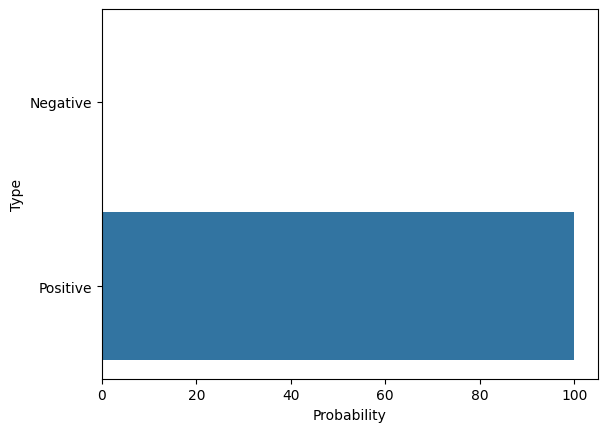

In [6]:
plt.Figure(figsize=(1, 1), dpi=200)
sns.barplot(data=df, x="Probability", y="Type")
plt.show()

In [7]:
%%writefile app.py

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification, AutoTokenizer


def predict(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    proba = F.softmax(outputs.logits, dim=1)
    proba = proba.detach().numpy().flatten()
    proba = 100 * proba
    # proba = 100 * np.round(proba, 2)

    return proba


tokenizer = AutoTokenizer.from_pretrained("jarvisx17/japanese-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained(
    "jarvisx17/japanese-sentiment-analysis"
)

st.title("感情分析アプリ")
st.header("テキストからポジネガ判定を実施します。")

# User input
text = st.text_input("テキストを入力してください")

if st.button("分析を実行"):
    with st.spinner("推論中..."):
        proba = predict(text)

        # 確率グラフを表示
        df = pd.DataFrame(proba, columns=["Probability"])
        df["Type"] = ["Negative", "Positive"]
        fig = plt.figure(figsize=(15, 5))
        sns.barplot(data=df, x="Probability", y="Type")
        st.pyplot(fig)

        # 確率を表示
        st.write(f"Negative: {df['Probability'].loc[0]}%")
        st.write(f"Positive: {df['Probability'].loc[1]}%")


Overwriting app.py
